In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1" #model will be trained on GPU 1

In [2]:
import tensorflow.keras
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Constant, RandomNormal
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
file = '../data/Hz31.txt'
data = pd.read_csv(file, names=['z', 'hz', 'err'], sep = " " )
data.describe()

,z,hz,err
count,31.000000,31.000000,31.000000
mean,0.661219,105.922581,21.303226
std,0.520398,38.413424,14.587768
min,0.070000,68.600000,4.000000
25%,0.275000,78.950000,12.000000
50%,0.470000,90.000000,17.000000
75%,0.890000,121.000000,27.900000
max,1.965000,202.000000,62.000000


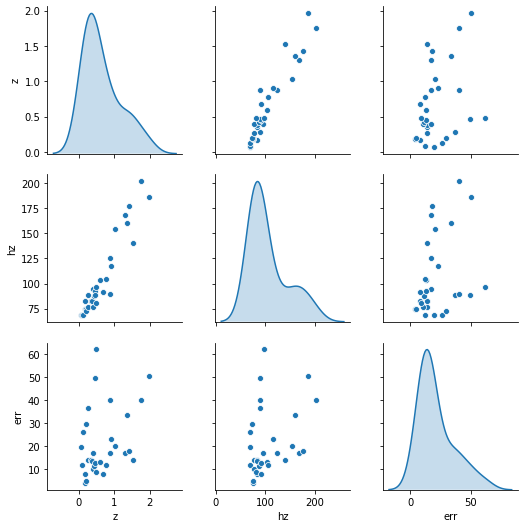

In [96]:
sns.pairplot(data, diag_kind="kde")
plt.savefig("DistHD.png")

In [97]:
# a = np.array([25,  3,  9,  7, 19,  2, 17, 16,  6, 28, 12, 20, 21, 26, 27, 11,  1,
#        10, 30, 13, 29,  0,  8, 18, 24,  5, 23,  4, 22, 15, 14])
# randomize = np.random.permutation(len(data.values))
shuffle = [x for x in range(len(data.values)) if x%2 ==0]
comp = [x for x in range(len(data.values)) if x%2 ==1]
shuffle.extend(comp)

data = data.values[shuffle]
# shuffle

In [98]:
# def norm(x):
#     return (x - train_stats['mean']) / train_stats['std']
# normed_train_data = norm(train_dataset)
# normed_test_data = norm(test_dataset)


Read the data for cosmic chronometers

In [99]:

# odds = [x for x in range(len(data)) if x%2 ==0]
# even = [x for x in range(len(data)) if x%2 ==1]
# new_order = np.array(even+odds)
# new_order = np.array([x for x in range(len(data)-1, 0, -1)])
# data = data.values[new_order]
# data = data.values


In [100]:
z = data[:,0]
y = data[:,1:]
# print(randomize)

In [101]:
scalerz = StandardScaler()
# scalerz = MinMaxScaler(feature_range=(-1,1))
# fit scaler on data
scalerz.fit(z.reshape(-1,1))
# apply transform
z = scalerz.transform(z.reshape(-1,1))

# scalery = MinMaxScaler(feature_range=(0,1))
# scalery = StandardScaler()
# scalery.fit(y)
# y = scalery.transform(y)

In [102]:
split = 0.8
ntrain = int(split * len(z))
indx = [ntrain]
z_train, z_test = np.split(z, indx)
y_train, y_test = np.split(y, indx)

In [11]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min',
                                   min_delta=0.0,
                                   patience=50.0,
                                   restore_best_weights=True)]
#                      tf.keras.callbacks.ReduceLROnPlateau(patience=2)]
# initializer = Constant(value=0.01)
# initializer = RandomNormal()
#     efirst = Dense(150, activation='relu', input_shape=(1,))(input_z)
#     ehidden = Dense(50, activation='relu')(efirst)
# #     ehidden = Dense(150, activation='relu')(efirst)
#     ehidden2 = Dense(150, activation='relu')(ehidden)
#     ehidden2 = Dense(150, activation='relu')(ehidden2)
#     elast = Dense(2, activation='relu')(ehidden2)



In [12]:
def model(input_z):
    efirst = Dense(50, activation='relu', input_shape=(1,))(input_z)
    ehidden = Dense(200, activation='relu')(efirst)
    ehidden2 = Dense(150, activation='relu')(ehidden)
    elast = Dense(2, activation='linear')(ehidden2)


    return elast


input_z = Input(shape = (1,))
neural_model = Model(input_z, model(input_z))
neural_model.compile(loss='mean_squared_error', optimizer = "adam")
neural_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 200)               10200     
_________________________________________________________________
dense_2 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 302       
Total params: 40,752
Trainable params: 40,752
Non-trainable params: 0
_________________________________________________________________


In [13]:
# batch_size = 4
batch_size = 4
epochs = 100
input_z = Input(shape = (1,))

In [14]:
# autoencoder = Model(input_z, autoencoder(input_z))
# autoencoder.compile(loss='mean_squared_error', optimizer = "adam")
# autoencoder.summary()

In [15]:
model_train = neural_model.fit(z_train, y_train, batch_size=batch_size,
                                    epochs=epochs,verbose=1,
                                    validation_data=(z_test, y_test))
#                                     callbacks=callbacks)

Epoch 1/100
6/6 [==============================] - 0s 16ms/step - loss: 5348.8613 - val_loss: 10955.6924
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 5304.1357 - val_loss: 10875.2480
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 5246.8193 - val_loss: 10745.8564
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 5140.1372 - val_loss: 10553.1143
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 4991.3335 - val_loss: 10248.7500
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 4762.0972 - val_loss: 9815.1504
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 4413.7598 - val_loss: 9179.7910
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 3985.9128 - val_loss: 8281.4736
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 3378.8066 - val_loss: 7142.7544
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - l

6/6 [==============================] - 0s 3ms/step - loss: 127.4911 - val_loss: 319.7544
Epoch 82/100
6/6 [==============================] - 0s 3ms/step - loss: 124.7388 - val_loss: 365.3382
Epoch 83/100
6/6 [==============================] - 0s 4ms/step - loss: 123.8886 - val_loss: 355.5200
Epoch 84/100
6/6 [==============================] - 0s 3ms/step - loss: 125.4353 - val_loss: 338.0800
Epoch 85/100
6/6 [==============================] - 0s 3ms/step - loss: 124.3620 - val_loss: 341.6527
Epoch 86/100
6/6 [==============================] - 0s 3ms/step - loss: 122.5632 - val_loss: 360.2766
Epoch 87/100
6/6 [==============================] - 0s 3ms/step - loss: 122.7336 - val_loss: 359.9820
Epoch 88/100
6/6 [==============================] - 0s 3ms/step - loss: 123.5490 - val_loss: 351.0674
Epoch 89/100
6/6 [==============================] - 0s 3ms/step - loss: 123.2143 - val_loss: 365.1820
Epoch 90/100
6/6 [==============================] - 0s 3ms/step - loss: 123.4174 - val_loss: 34

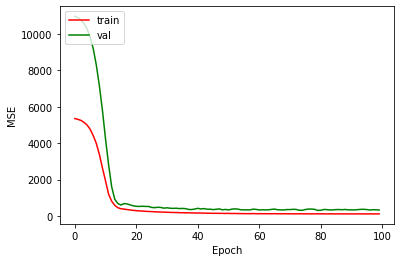

In [16]:
plt.plot(model_train.history['loss'], color='r', )
plt.plot(model_train.history['val_loss'], color='g')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("loss_hz.png", dpi=200)


In [17]:
#uncer net
unet = np.sqrt(np.min(model_train.history['val_loss']))
print(np.min(model_train.history['loss']), np.min(model_train.history['val_loss']))
print(model_train.history['loss'][-1], model_train.history['val_loss'][-1])
# 89.80142211914062 433.94439697265625 1000 epochs
# 142.0643768310547 398.6059875488281 500 epochs
# 131.62310791015625 292.6696472167969 100 epochs
# 127.3431625366211 357.522857666015
# 101.05652618408203 233.70008850097656


121.4001235961914 314.58612060546875
122.7384033203125 333.7161560058594


In [18]:
pred = neural_model.predict(z_test)
pred

array([[ 90.0835  ,  18.37242 ],
       [101.55425 ,  20.588856],
       [112.58064 ,  22.7575  ],
       [114.228226,  23.083061],
       [142.5984  ,  28.69826 ],
       [152.05042 ,  30.575226],
       [175.71353 ,  35.27834 ]], dtype=float32)

In [19]:
#zor and yor are the original velues for z and [Hz, err]
zor = scalerz.inverse_transform(z.reshape(-1,1))
# yor = scalery.inverse_transform(y)

In [20]:
ranz = np.random.uniform(0, 2, size=10000)
r = scalerz.transform(ranz.reshape(-1, 1))
pred_random = neural_model.predict(r)
rr = scalerz.inverse_transform(r.reshape(-1,1))
# predy = scalery.inverse_transform(pred_random)


(0.0, 2.0)

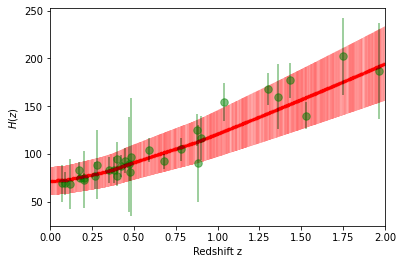

In [21]:
# plt.errorbar(zor, yor[:,0], yor[:,1], fmt='g.', markersize=15, label='Observations', alpha=0.5)
# plt.errorbar(rr, predy[:,0], predy[:,1], fmt='r.', markersize=5, label='Synthetic', alpha=0.01)
plt.errorbar(zor, y[:,0], y[:,1], fmt='g.', markersize=15, label='Observations', alpha=0.5)
plt.errorbar(rr, pred_random[:,0], pred_random[:,1], fmt='r.', markersize=5, label='Synthetic', alpha=0.01)
plt.xlabel("Redshift z")
plt.ylabel("$H(z)$")
plt.xlim(0, 2)
# plt.savefig("500_epochs_HD.png")

In [22]:
# Cosmological constants
Om = 0.27
# variance network


In [23]:
def Hlcdm(z, H0=73.24):
    return H0 * np.sqrt(Om*(1+z)**3 + 1 - Om)

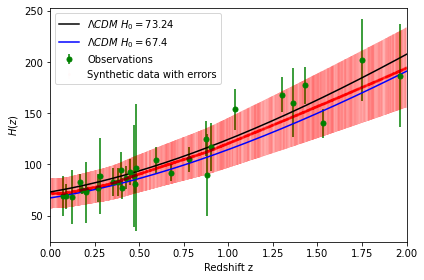

In [24]:
z = np.linspace(0, 2, 10000)
# plt.errorbar(zor, yor[:,0], yor[:,1], fmt='g.', markersize=10, label='Observations')
# plt.errorbar(rr, predy[:,0], predy[:,1], fmt='r.', markersize=4., label='Synthetic data with errors', alpha=0.01)
plt.errorbar(zor, y[:,0], y[:,1], fmt='g.', markersize=10, label='Observations')
plt.errorbar(rr, pred_random[:,0], pred_random[:,1], fmt='r.', markersize=4., label='Synthetic data with errors', alpha=0.01)

plt.plot(z, Hlcdm(z), label='$\Lambda CDM$ $H_0 = 73.24$', c='k')
plt.plot(z, Hlcdm(z, H0=67.4), label='$\Lambda CDM$ $H_0 = 67.4$', c='b')
plt.xlabel("Redshift z")
plt.ylabel("$H(z)$")
plt.xlim(0, 2)
plt.tight_layout()
plt.legend()

# plt.savefig("SyntheticHDrelu4.png",dpi=800)

In [25]:
pred_random.shape, r.shape

((10000, 2), (10000, 1))

In [26]:
# randomselection = np.random.randint(0,1000,50)
randomselection = np.random.randint(0,1000,100)

rr_reduced = rr[randomselection,:]
# predy_reduced = predy[randomselection,:]
predy_reduced = pred_random[randomselection,:]

In [27]:
mookHz = np.concatenate((rr_reduced.reshape(-1,1), predy_reduced), axis=1)


np.savetxt("autoEncoderHz100.dat",mookHz, delimiter=" ")

In [28]:
predy_reduced[:,1]

array([28.615011 , 32.045326 , 20.222258 , 17.067123 , 20.184511 ,
       16.289324 , 21.097734 , 36.144745 , 24.794056 , 36.5705   ,
       29.921011 , 32.689384 , 19.66576  , 32.953186 , 14.826933 ,
       14.898885 , 20.89527  , 23.686712 , 21.314173 , 15.443687 ,
       17.652063 , 32.38645  , 34.349636 , 28.86989  , 36.924904 ,
       36.244305 , 29.922132 , 27.10346  , 20.329489 , 22.07282  ,
       28.703176 , 21.532213 , 22.213673 , 14.856789 , 37.32582  ,
       38.633816 , 28.616001 , 20.79482  , 27.66568  , 20.220867 ,
       16.104479 , 34.37225  , 32.259327 , 15.678162 , 27.587282 ,
       16.272476 , 29.262083 , 16.601429 , 14.839697 , 27.429842 ,
       31.68822  , 28.615011 , 17.137028 , 29.644842 , 33.518436 ,
       28.616001 , 18.178665 , 29.715887 , 25.654966 , 14.7710705,
       32.851685 , 27.10346  , 20.635044 , 23.686712 , 25.764975 ,
       24.923025 , 19.298786 , 33.187973 , 34.206215 , 34.21661  ,
       36.84174  , 27.587282 , 14.848775 , 17.667164 , 19.0399

In [29]:
error  = predy_reduced[:,1]**2
error

array([ 818.81885, 1026.903  ,  408.9397 ,  291.2867 ,  407.4145 ,
        265.34207,  445.1144 , 1306.4426 ,  614.74524, 1337.4014 ,
        895.2669 , 1068.5958 ,  386.74213, 1085.9125 ,  219.83794,
        221.97676,  436.61227,  561.06036,  454.29395,  238.50748,
        311.59534, 1048.8822 , 1179.8975 ,  833.4706 , 1363.4485 ,
       1313.6497 ,  895.334  ,  734.59753,  413.28812,  487.2094 ,
        823.8723 ,  463.6362 ,  493.44727,  220.72417, 1393.2169 ,
       1492.5718 ,  818.87555,  432.42456,  765.38983,  408.88345,
        259.35425, 1181.4515 , 1040.6642 ,  245.80475,  761.05817,
        264.7935 ,  856.26953,  275.60745,  220.2166 ,  752.39624,
       1004.14325,  818.81885,  293.67773,  878.81665, 1123.4856 ,
        818.87555,  330.46387,  883.03394,  658.1773 ,  218.18452,
       1079.2332 ,  734.59753,  425.80505,  561.06036,  663.8339 ,
        621.15717,  372.44315, 1101.4415 , 1170.0652 , 1170.7764 ,
       1357.3137 ,  761.05817,  220.48611,  312.1287 ,  362.52

In [30]:
diagcov = np.diag(error) #inverso
np.savetxt("autoEncoderHz_cov100.dat", diagcov, delimiter= " ", header="#100 100")
np.shape(diagcov)

(100, 100)

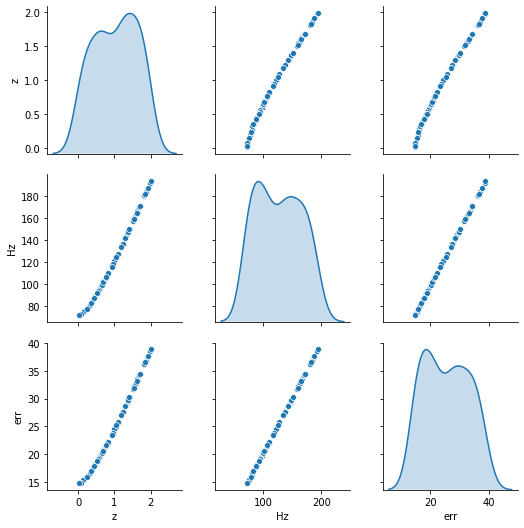

In [31]:
dfMook = pd.DataFrame(mookHz, columns=['z', 'Hz', 'err'])
sns.pairplot(dfMook, diag_kind="kde")
# plt.savefig("100hdmook.png")

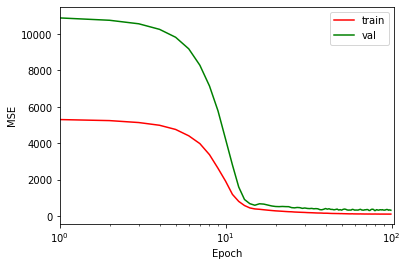

In [32]:
plt.plot(model_train.history['loss'], color='r')
plt.plot(model_train.history['val_loss'], color='g')
plt.xlim(1)
plt.xscale('log')
plt.ylabel('MSE')
# plt.yscale('log')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
# plt.savefig("loss_hz.png", dpi=200)
# plt.savefig("epochs_for_Hz.png", dpi=200)

In [33]:
def model2(input_z):
    x = Dense(50, activation='relu', input_shape=(1,))(input_z)
    x = Dense(200, activation='relu')(x)
    x = Dense(150, activation='relu')(x)
    x = Dense(2, activation='linear')(x)


    return elast


input_z = Input(shape = (1,))
neural_model2 = Model(input_z, model(input_z))
neural_model2.compile(loss='mean_squared_error', optimizer = "adam")
neural_model2.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_5 (Dense)              (None, 200)               10200     
_________________________________________________________________
dense_6 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 302       
Total params: 40,752
Trainable params: 40,752
Non-trainable params: 0
_________________________________________________________________


In [140]:
yy = y[:,0].reshape(-1,1)
zz = zor
split = 0.8
ntrain = int(split * len(zz))
indx = [ntrain]
zz_train, zz_test = np.split(zz, indx)
yy_train, yy_test = np.split(yy, indx)
np.shape(zz_train), np.shape(yy_train), np.shape(zz_test), np.shape(yy_test)

((24, 1), (24, 1), (7, 1), (7, 1))

In [141]:
from astroNN.nn.layers import MCDropout

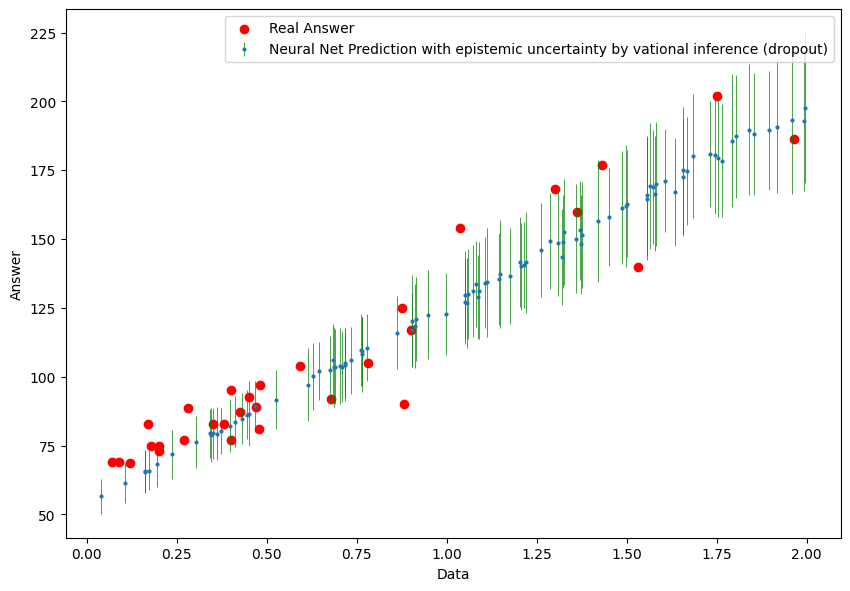

In [145]:
def model_regression_dropout(num_hidden):
    # Defeine Keras model for regression
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(batch_input_shape=((None, 1))))
    model.add(Dense(units=num_hidden[0], 
#                     kernel_regularizer=tf.keras.regularizers.l2(1e-4),
#                     kernel_initializer='he_normal', 
                    activation='relu'))
    model.add(MCDropout(0.3))
    model.add(Dense(units=num_hidden[1], 
#                     kernel_regularizer=tf.keras.regularizers.l2(1e-4),
#                     kernel_initializer='he_normal', 
                    activation='relu'))
    model.add(MCDropout(0.3))
    model.add(Dense(units=num_hidden[2], 
#                     kernel_regularizer=tf.keras.regularizers.l2(1e-4),
#                     kernel_initializer='he_normal', 
                    activation='relu'))
    model.add(MCDropout(0.3))
    model.add(Dense(units=1, activation="linear"))
    return model

#Define some parameter
batch_size = 4
# optimizer = Adam(lr=.005)
optimizer = Adam(lr=.0001)


# Compile Keras model
model = model_regression_dropout(num_hidden=[150, 150, 150])
model.compile(loss='mse', optimizer=optimizer) 
model2_train = model.fit(zz_train, yy_train, 
#                          validation_split=0.0, 
                         batch_size=batch_size, epochs=200, verbose=0,
                         validation_data=(zz_test, yy_test))

# Generate test data
test_batch_size = 100
x_test = np.random.uniform(0, 2., test_batch_size)

mc_dropout_num = 100  # Run Dropout 100 times
predictions = np.zeros((mc_dropout_num, test_batch_size, 1))
uncertainty = np.zeros((mc_dropout_num, test_batch_size, 1))
for i in range(mc_dropout_num):
    predictions[i] = model.predict(x_test)
    
# get mean results and its varience
prediction_mc_dropout = np.mean(predictions, axis=0)
std_mc_dropout = np.std(predictions, axis=0)
    
# Array for the real equation
# x_true = np.arange(0.0, 2.0,0.1)
y_true = y[:,0]

# Plotting
plt.figure(figsize=(10, 7), dpi=100)
plt.errorbar(x_test, prediction_mc_dropout, yerr=std_mc_dropout[:, 0], markersize=2, fmt='o', 
             ecolor='g', capthick=2, elinewidth=0.5, 
             label='Neural Net Prediction with epistemic uncertainty by vational inference (dropout)')
# plt.axvline(x=1.0, label="Training Data range (0.0 to 1.0)")
plt.scatter(zz, yy, color='red', label='Real Answer')
plt.xlabel('Data')
plt.ylabel('Answer')
plt.legend(loc='best')
plt.show()

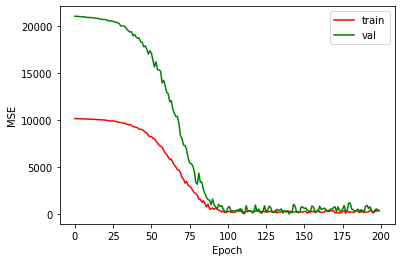

In [146]:
plt.plot(model2_train.history['loss'], color='r')
plt.plot(model2_train.history['val_loss'], color='g')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')